In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_excel("Strikers_performance.xlsx")
df.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [5]:
print(df.isnull().sum())

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
nominal_cols = df.select_dtypes(include=['object']).columns

In [7]:
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [8]:
nom_imputer = SimpleImputer(strategy='most_frequent')
df[nominal_cols] = nom_imputer.fit_transform(df[nominal_cols])

In [9]:
cols_to_int = [
    'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'
]

df[cols_to_int] = df[cols_to_int].astype(int)

In [10]:
df.describe().round(2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


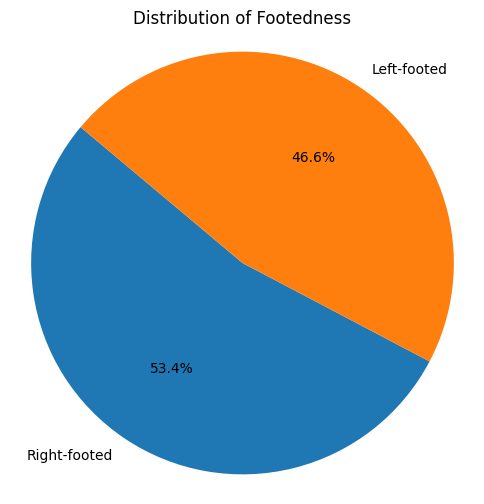

In [11]:
import matplotlib.pyplot as plt

# Calculate footedness percentages
footedness_counts = df['Footedness'].value_counts()
footedness_percent = footedness_counts / footedness_counts.sum() * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(footedness_percent, labels=footedness_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Footedness')
plt.axis('equal')
plt.show()

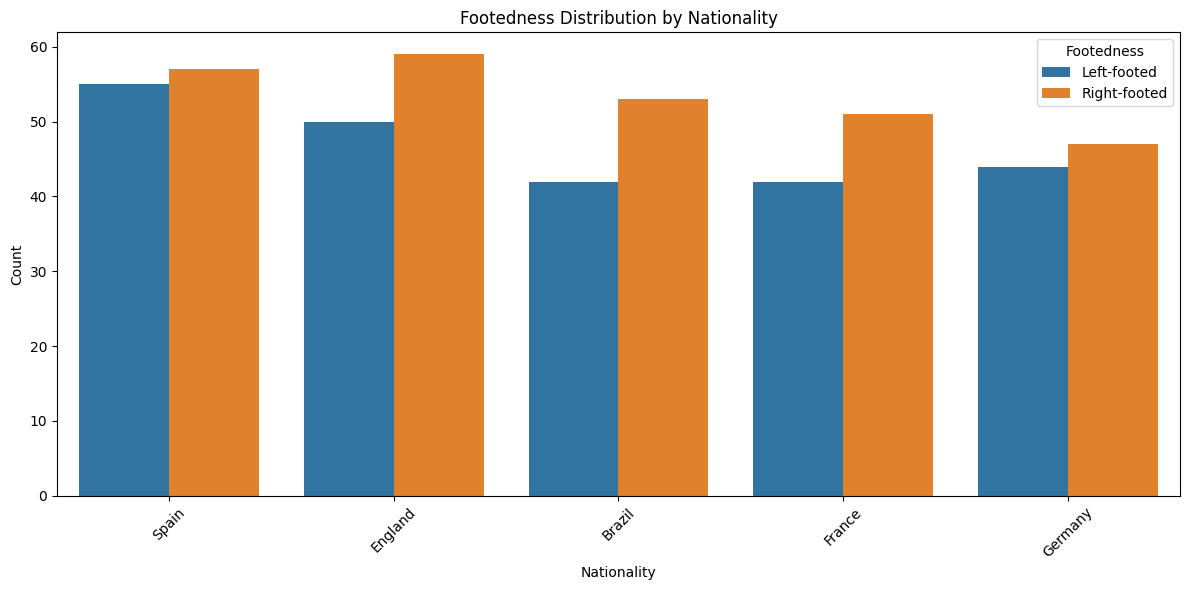

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Nationality', hue='Footedness', order=df['Nationality'].value_counts().index)
plt.title('Footedness Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Footedness')
plt.tight_layout()
plt.show()


In [13]:
# Group by Nationality and compute mean goals
avg_goals_by_nation = df.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending=False)
print(avg_goals_by_nation)


Nationality
Brazil     15.315789
Spain      14.687500
France     14.408602
Germany    14.351648
England    13.899083
Name: Goals Scored, dtype: float64


In [14]:
avg_conversion_by_foot = df.groupby('Footedness')['Conversion Rate'].mean()
print(avg_conversion_by_foot)


Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64


In [15]:
from scipy.stats import shapiro, levene, f_oneway

# Check Levene's test for equal variances
levene_test = levene(*[group['Consistency'].values for name, group in df.groupby('Nationality')])
print("Levene’s test p-value:", levene_test.pvalue)

# ANOVA (only if variance is equal)
anova_result = f_oneway(*[group['Consistency'].values for name, group in df.groupby('Nationality')])
print("ANOVA p-value:", anova_result.pvalue)


Levene’s test p-value: 0.8083990350934653
ANOVA p-value: 0.19278675901599154


In [16]:
from scipy.stats import pearsonr

# Check correlation (Pearson)
corr_coef, p_value = pearsonr(df['Hold-up Play'], df['Consistency'])
print(f"Pearson correlation: {corr_coef:.2f}, p-value: {p_value:.4f}")


Pearson correlation: 0.15, p-value: 0.0010


In [17]:
import statsmodels.api as sm

# Independent and dependent variables
X = df['Hold-up Play']
y = df['Consistency']

# Add constant for intercept
X_const = sm.add_constant(X)

# Build model
model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Mon, 14 Jul 2025   Prob (F-statistic):            0.00101
Time:                        12:33:35   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

In [18]:
contribution_features = [
    'Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success',
    'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Consistency'
]

# Sum selected features to create Total Contribution Score
df['Total Contribution Score'] = df[contribution_features].sum(axis=1)


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Footedness'] = le.fit_transform(df['Footedness'])  # e.g., Right-footed = 1, Left-footed = 0
df['Marital Status'] = le.fit_transform(df['Marital Status'])  # Yes = 1, No = 0


In [20]:
df = pd.get_dummies(df, columns=['Nationality'], drop_first=True)


In [21]:
df_clustering = df.drop(columns=['Striker_ID'])


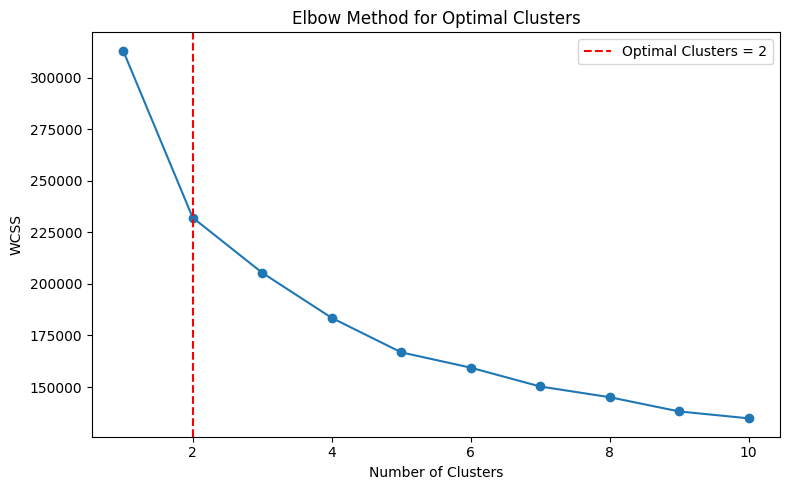

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Plot elbow chart
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=2, color='red', linestyle='--', label='Optimal Clusters = 2')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering)


In [24]:
df.groupby('Cluster')['Total Contribution Score'].mean()


Cluster
0    101.846088
1    123.350913
Name: Total Contribution Score, dtype: float64

In [25]:
# According to instruction: Cluster 0 = Best Strikers, Cluster 1 = Regular Strikers
df['Strikers types'] = df['Cluster'].map({0: 'Best strikers', 1: 'Regular strikers'})

# Optional: Binary version for modeling
df['Strikers types'] = df['Strikers types'].map({'Regular strikers': 0, 'Best strikers': 1})

# Drop original cluster column
df.drop(columns=['Cluster'], inplace=True)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
X = df.drop(columns=['Striker_ID', 'Strikers types'])
y = df['Strikers types']  # This is our target


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 96.00%


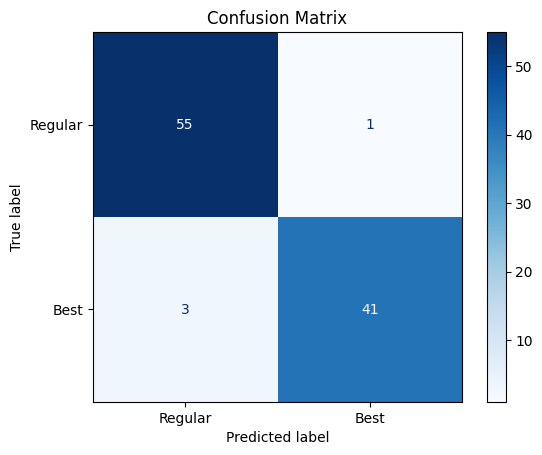

In [31]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Regular', 'Best'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [33]:
df.to_csv("best_strikers_final.csv", index=False)

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Striker_ID                  500 non-null    float64
 1   Footedness                  500 non-null    int64  
 2   Marital Status              500 non-null    int64  
 3   Goals Scored                500 non-null    int64  
 4   Assists                     500 non-null    int64  
 5   Shots on Target             500 non-null    int64  
 6   Shot Accuracy               500 non-null    float64
 7   Conversion Rate             500 non-null    float64
 8   Dribbling Success           500 non-null    float64
 9   Movement off the Ball       500 non-null    int64  
 10  Hold-up Play                500 non-null    int64  
 11  Aerial Duels Won            500 non-null    int64  
 12  Defensive Contribution      500 non-null    int64  
 13  Big Game Performance        500 non